# Master file for all plots
This file will eventually produce all the plots.

Currently, I would recommend creating the DM vs redshift, and DM vs impact parameter plots from the FRBProject-main file.

In [56]:
# imports packages
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
#import csv
import random
import scipy.integrate as integrate
from numpy import genfromtxt
from random import randrange
from numpy.polynomial import Polynomial as P
from IPython.display import Latex
import time
from decimal import Decimal
import matplotlib.ticker as mticker
import matplotlib.patches as patches


# Run chapters for functions

In [2]:
%run FRBProject-Chap1-ParametersAndFunctions.ipynb

In [50]:
def histArray(arr,nbin,Ncel,DMmin,DMmax):
    hist, bins = np.histogram(arr,bins=nbin,range=(DMmin, DMmax))
    dv=bins[1]-bins[0]
    hist=(hist)/(dv*Ncel**2)
    cumulative = (np.cumsum(hist)*dv)
    center = (bins[:-1] + bins[1:]) / 2
    return center, hist, cumulative[-1]


In [177]:
def create_histograms(halos_reAdded_translated,resolution):
    nbin=100
    hist = histArray(sum(halos_reAdded_translated[:,:,:]),nbin,int(1024*resolution),0,3*np.mean(sum(halos_reAdded_translated[:,:,:])))

    return hist

In [184]:
test= create_histograms(STH1_256[1],1)

In [185]:
test1= histArray(STH1_256[1],100,1024,0,3*np.mean(STH1_256[1]))

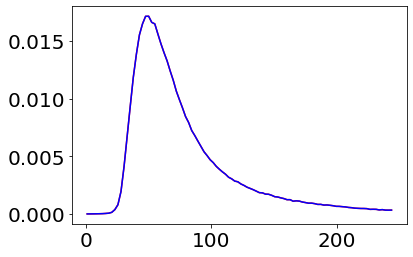

In [186]:
plt.plot(test[0],test[1],'r')
plt.plot(test1[0],test1[1],'b')

In [149]:
np.mean(STH1_256[1])

81.57802901499198

# Loading arrays

In [115]:
## Density fields

all_den_fields_256 = np.load('all_den_fields_256.npy')
# all_den_fields_512 = np.load('all_den_fields_512.npy')


# Spherical tophat; 1 Rvir
# STH1_256 = np.load('STH1_256.npy',allow_pickle=True)
# STH2_256 = np.load('STH2_256.npy',allow_pickle=True)
# STH4_256 = np.load('STH4_256.npy',allow_pickle=True)
# STH8_256 = np.load('STH8_256.npy',allow_pickle=True)
# STH16_256 = np.load('STH16_256.npy',allow_pickle=True)
# STH32_256 = np.load('STH32_256.npy',allow_pickle=True)


# STH1_512 = np.load('STH1_512.npy',allow_pickle=True)
# STH2_512 = np.load('STH2_512.npy',allow_pickle=True)
# STH4_512 = np.load('STH4_512.npy',allow_pickle=True)
# STH8_512 = np.load('STH8_512.npy',allow_pickle=True)


# Spherical tophat; 2 Rvir
# STH1_2_256 = np.load('STH1_2_256.npy',allow_pickle=True)
# STH2_2_256 = np.load('STH2_2_256.npy',allow_pickle=True)
# STH4_2_256 = np.load('STH4_2_256.npy',allow_pickle=True)
# STH8_2_256 = np.load('STH8_2_256.npy',allow_pickle=True)
# STH16_2_256 = np.load('STH16_2_256.npy',allow_pickle=True)
# STH32_2_256 = np.load('STH32_2_256.npy',allow_pickle=True)




# Fire

# fire1_256 = np.load('fire1_256.npy',allow_pickle=True)
# fire2_256 = np.load('fire2_256.npy',allow_pickle=True)
# fire4_256 = np.load('fire4_256.npy',allow_pickle=True)
# fire8_256 = np.load('fire8_256.npy',allow_pickle=True)
# fire16_256 = np.load('fire16_256.npy',allow_pickle=True)
# fire32_256 = np.load('fire32_256.npy',allow_pickle=True)



# NFW

# NFW1_256 = np.load('NFW1_256.npy',allow_pickle=True)
# NFW2_256 = np.load('NFW2_256.npy',allow_pickle=True)
# NFW4_256 = np.load('NFW4_256.npy',allow_pickle=True)
# NFW8_256 = np.load('NFW8_256.npy',allow_pickle=True)
# NFW16_256 = np.load('NFW16_256.npy',allow_pickle=True)
# NFW32_256 = np.load('NFW32_256.npy',allow_pickle=True)



# STH1_512 = np.load('STH1_512.npy',allow_pickle=True)
# STH2_512 = np.load('STH2_512.npy',allow_pickle=True)
# STH4_512 = np.load('STH4_512.npy',allow_pickle=True)
# STH8_512 = np.load('STH8.npy',allow_pickle=True)




# Precipitation
# P1_256 = np.load('P1_256.npy',allow_pickle=True)
# P2_256 = np.load('P2_256.npy',allow_pickle=True)
# P4_256 = np.load('P4_256.npy',allow_pickle=True)
# P8_256 = np.load('P8_256.npy',allow_pickle=True)
# P16_256 = np.load('P16_256.npy',allow_pickle=True)
# P32_256 = np.load('P32_256.npy',allow_pickle=True)

## Arrays for DM vs Radius plot

In [7]:
# # Arrays of DM vs Radius plot

# # Load profile arrays
STH_DMvsR = np.load('STH_DMvsR.npy',allow_pickle=True)
STH8_2_DMvsR = np.load('STH8_2_DMvsR.npy',allow_pickle=True)
NFW_DMvsR = np.load('NFW_DMvsR.npy',allow_pickle=True)
fire_DMvsR = np.load('fire_DMvsR.npy',allow_pickle=True)


# # Load mask arrays
STH_masks = np.load('STH_masks.npy',allow_pickle=True)
STH8_2_masks = np.load('STH8_2_masks.npy',allow_pickle=True)
NFW_masks = np.load('NFW_masks.npy',allow_pickle=True)
fire_masks = np.load('fire_masks.npy',allow_pickle=True)

df = np.load('ordered_halo_dataframe.npy',allow_pickle=True)

# Mass bins
M1=1
M2=8
M3=15
M4=22
M5=28

M_chosen = [M1, M2, M3, M4, M5]


## Arrays for DM for different redshifts

In [387]:
# Loading arrays for all redshifts
# STH1_256_RS_array = np.load('STH1_256_RS_array.npy',allow_pickle=True)
STH8_256_RS_array = np.load('STH8_256_RS_array.npy',allow_pickle=True)
# NFW8_256_RS_array = np.load('NFW8_256_RS_array.npy',allow_pickle=True)
# fire8_256_RS_array = np.load('fire8_256_RS_array.npy',allow_pickle=True)



# All plots

In [7]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
XBIG_SIZE = 18
axis_fontsize = 12
curve_lw = 3
axis_label = 24
sub_title_size= 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=axis_fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=axis_label)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=sub_title_size)  # fontsize of the figure title

## Halo removal and addition process

In [109]:
L/256*100

139.50892857142858

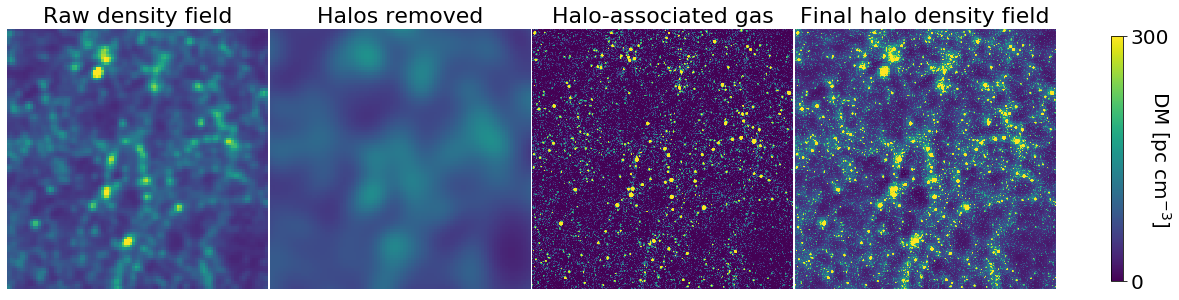

In [123]:
## Image plots of methodology


# Raw 256 density field
# Only halo field 1024
# Halos removed field 1024
# Halos readded field 8K

# Outputs:histograms,halos-readded field, halo addition masks, halos field for subtraction, halo addition field, stacked halo field

# Grid and color settings

l=0
u=100

vmin = 0
vmax= 300



f, ([ax1,ax2,ax4,ax5]) = plt.subplots(1, 4, gridspec_kw={'hspace': 0.015, 'wspace': .01},figsize=(20,10),) # f is the whole plot

# original density

axis1=ax1.imshow(all_den_fields_256[0,l:u,l:u],vmin=vmin,vmax=vmax)
axis2=ax2.imshow(3*STH8_256[3][0,l:u,l:u],vmin=vmin,vmax=vmax)
axis4=ax4.imshow(STH8_256[4][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis5=ax5.imshow(STH8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)




# axis1=ax1.imshow(orig_den_256[0:u,0:u],vmin=vmin,vmax=vmax)
# axis2 = ax2.imshow(test_conv[3][0:4*u,0:4*u],vmin=vmin,vmax=vmax)
# axis4=ax4.imshow(test_conv[1][0:u,0:u],vmin=vmin,vmax=vmax)
# axis5=ax5.imshow(test_conv[0][0:4*u,0:4*u],vmin=vmin,vmax=vmax)


# Set ticks off
ax1.axis('off')
ax2.axis('off')
ax4.axis('off')
ax5.axis('off')


# f.colorbar(axis1,ax=ax2,shrink=0.5)
# f.colorbar(axis2,ax=ax2, shrink=0.5)
# f.colorbar(axis3,ax=ax3, shrink=0.5)
# f.colorbar(axis4,ax=ax4, shrink=0.5)
# f.colorbar(axis5,ax=ax5, shrink=0.5)


ax1.set_title('Raw density field',size=sub_title_size)
ax2.set_title('Halos removed',size=sub_title_size)
ax4.set_title('Halo-associated gas',size=sub_title_size)
ax5.set_title('Final halo density field',size=sub_title_size)

cbar=f.colorbar(axis1, ax=[ax1,ax2,ax4,ax5], orientation='vertical', fraction=.011,ticks=[0,vmax])
cbar.set_label('DM [pc cm$^{-3}$]', rotation=270,fontsize='20')
# cbar.set_label('DM', rotation=270,fontsize='20')

f.savefig('implot_add_remove_halos_256.pdf',bbox_inches='tight')

# All profiles

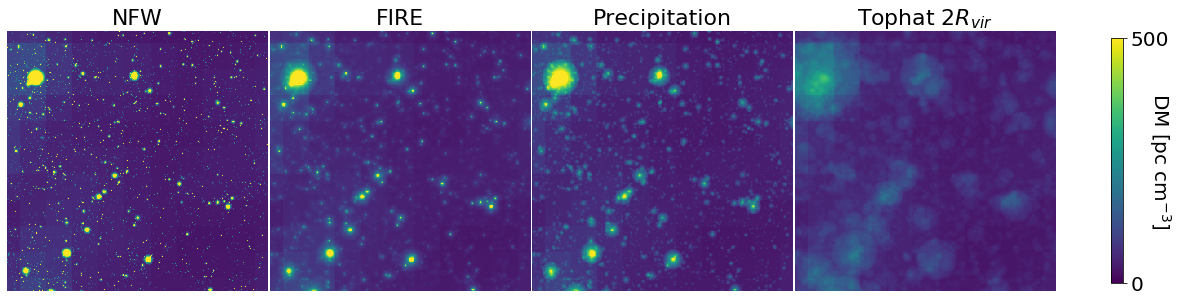

In [113]:
## Image plots of methodology


# Raw 256 density field
# Only halo field 1024
# Halos removed field 1024
# Halos readded field 8K

# Outputs:histograms,halos-readded field, halo addition masks, halos field for subtraction, halo addition field, stacked halo field

# Grid and color settings

l=0
u=10

vmin = 0
vmax= 500



f, ([ax1,ax2,ax4,ax5]) = plt.subplots(1, 4,gridspec_kw={'hspace': 0.015, 'wspace': .01} ,figsize=(20,10)) # f is the whole plot

# original density

axis1=ax1.imshow(NFW8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis2=ax2.imshow(fire8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis4=ax4.imshow(P8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis5=ax5.imshow(STH8_2_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)



# axis1=ax1.imshow(orig_den_256[0:u,0:u],vmin=vmin,vmax=vmax)
# axis2 = ax2.imshow(test_conv[3][0:4*u,0:4*u],vmin=vmin,vmax=vmax)
# axis4=ax4.imshow(test_conv[1][0:u,0:u],vmin=vmin,vmax=vmax)
# axis5=ax5.imshow(test_conv[0][0:4*u,0:4*u],vmin=vmin,vmax=vmax)


# Set ticks off
ax1.axis('off')
ax2.axis('off')
ax4.axis('off')
ax5.axis('off')


# f.colorbar(axis1,ax=ax2,shrink=0.5)
# f.colorbar(axis2,ax=ax2, shrink=0.5)
# f.colorbar(axis3,ax=ax3, shrink=0.5)
# f.colorbar(axis4,ax=ax4, shrink=0.5)
# f.colorbar(axis5,ax=ax5, shrink=0.5)


ax1.set_title('NFW',size=sub_title_size)
ax2.set_title('FIRE',size=sub_title_size)
ax4.set_title('Precipitation',size=sub_title_size)
ax5.set_title('Tophat 2$R_{vir}$',size=sub_title_size)

cbar=f.colorbar(axis1, ax=[ax1,ax2,ax4,ax5], orientation='vertical', fraction=.011,ticks=[0,vmax])
cbar.set_label('DM [pc cm$^{-3}$]', rotation=270,fontsize='20')
# cbar.set_label('DM', rotation=270,fontsize='20')

f.savefig('implot_add_remove_halos_256_all_1.pdf',bbox_inches='tight')

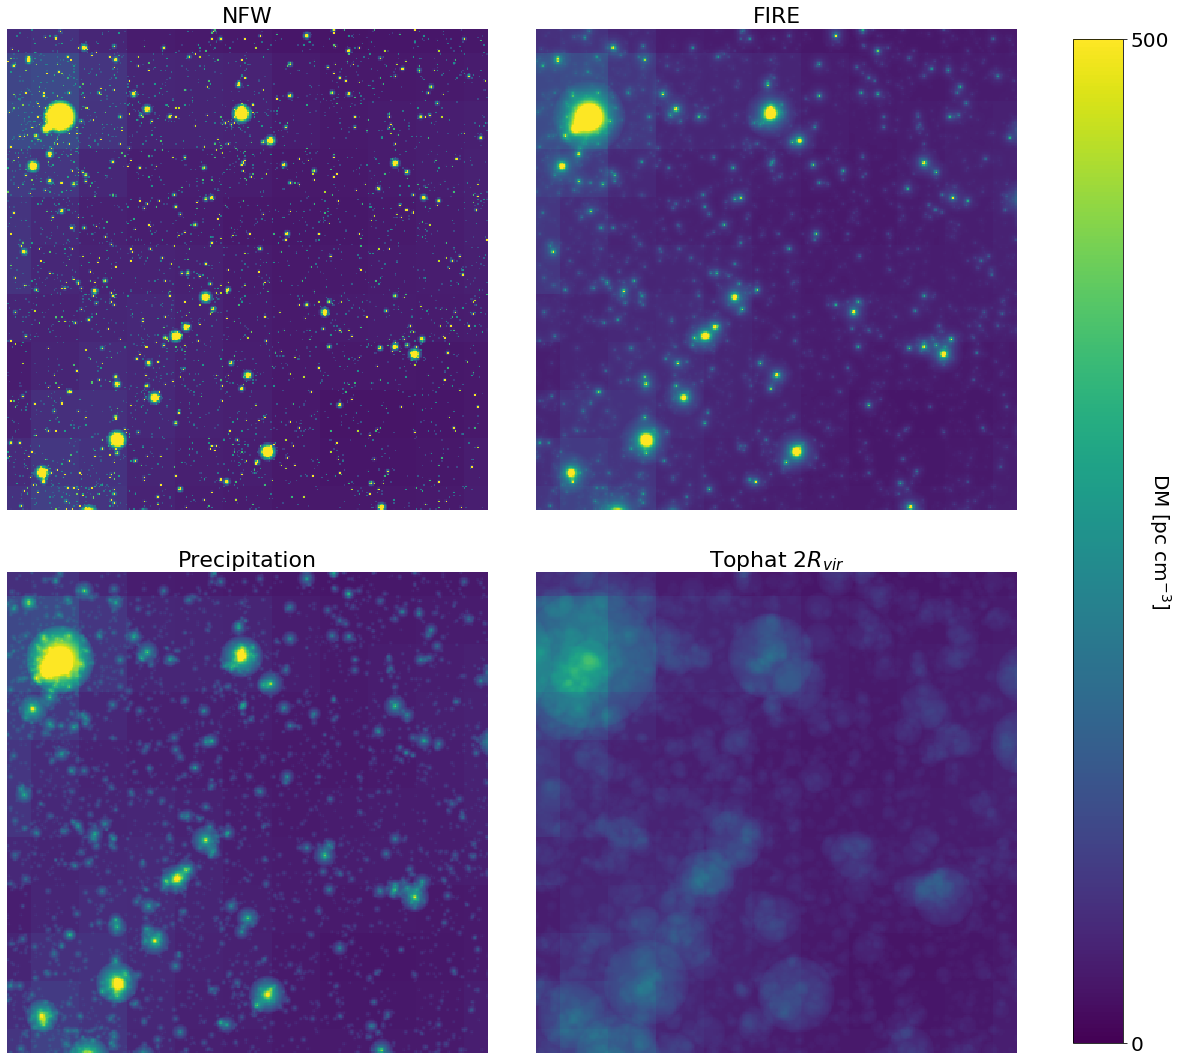

In [32]:
## Image plots of methodology


# Raw 256 density field
# Only halo field 1024
# Halos removed field 1024
# Halos readded field 8K

# Outputs:histograms,halos-readded field, halo addition masks, halos field for subtraction, halo addition field, stacked halo field

# Grid and color settings

l=0
u=10

vmin = 0
vmax= 500



f, ([ax1,ax2],[ax4,ax5]) = plt.subplots(2, 2,gridspec_kw={'hspace': 0, 'wspace': 0.1}, figsize=(20,20)) # f is the whole plot


# original density

axis1=ax1.imshow(NFW8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis2=ax2.imshow(fire8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis4=ax4.imshow(P8_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)
axis5=ax5.imshow(STH8_2_256[1][0,32*l:32*u,32*l:32*u],vmin=vmin,vmax=vmax)



# axis1=ax1.imshow(orig_den_256[0:u,0:u],vmin=vmin,vmax=vmax)
# axis2 = ax2.imshow(test_conv[3][0:4*u,0:4*u],vmin=vmin,vmax=vmax)
# axis4=ax4.imshow(test_conv[1][0:u,0:u],vmin=vmin,vmax=vmax)
# axis5=ax5.imshow(test_conv[0][0:4*u,0:4*u],vmin=vmin,vmax=vmax)


# Set ticks off
ax1.axis('off')
ax2.axis('off')
ax4.axis('off')
ax5.axis('off')


# f.colorbar(axis1,ax=ax2,shrink=0.5)
# f.colorbar(axis2,ax=ax2, shrink=0.5)
# f.colorbar(axis3,ax=ax3, shrink=0.5)
# f.colorbar(axis4,ax=ax4, shrink=0.5)
# f.colorbar(axis5,ax=ax5, shrink=0.5)


ax1.set_title('NFW',size=sub_title_size)
ax2.set_title('FIRE',size=sub_title_size)
ax4.set_title('Precipitation',size=sub_title_size)
ax5.set_title('Tophat 2$R_{vir}$',size=sub_title_size)

cbar=f.colorbar(axis1, ax=[ax1,ax2,ax4,ax5], orientation='vertical', fraction=.045,ticks=[0,vmax])
cbar.set_label('DM [pc cm$^{-3}$]', rotation=270,fontsize='20')
# cbar.set_label('DM', rotation=270,fontsize='20')

f.savefig('implot_add_remove_halos_256_all_2.pdf',bbox_inches='tight')

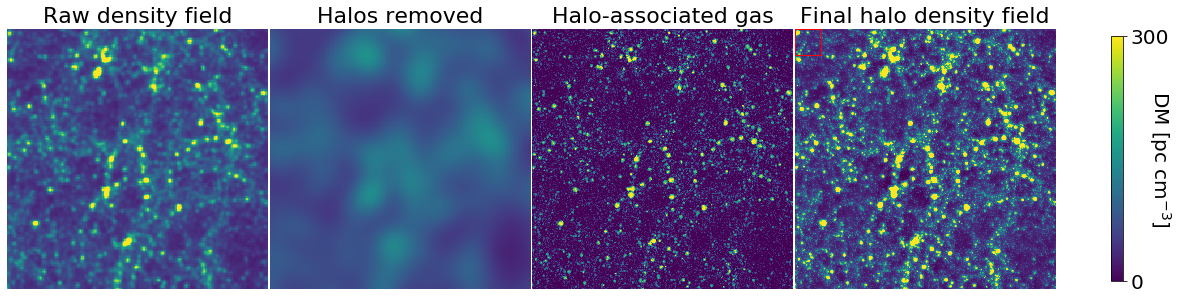

In [124]:
## Image plots of methodology

# All fields:
# Raw 512 density field
# Only halo field 1024
# Halos removed field 1024
# Halos readded field 8K

# Outputs:histograms,halos-readded field, halo addition masks, halos field for subtraction, halo addition field, stacked halo field

# Grid and color settings

l=0
u=200
du=0

vmin = 0
vmax= 300



f, ([ax1,ax2,ax4,ax5]) = plt.subplots(1, 4,gridspec_kw={'hspace': 0.015, 'wspace': .01}, figsize=(20,10)) # f is the whole plot

# original density

axis1=ax1.imshow(all_den_fields_512[0,l:u,l:u],vmin=vmin,vmax=vmax)
axis2=ax2.imshow(3*STH8_512[3][0,l:u,l:u],vmin=vmin,vmax=vmax)
axis4=ax4.imshow(STH8_512[4][0,16*l:16*u,16*l:16*u],vmin=vmin,vmax=vmax)
axis5=ax5.imshow(STH8_512[1][0,16*l:16*u,16*l:16*u],vmin=vmin,vmax=vmax)


rect = patches.Rectangle((0,0),320,320,linewidth=1,edgecolor='r',facecolor="none")
ax5.add_patch(rect)


# axis1=ax1.imshow(orig_den_256[0:u,0:u],vmin=vmin,vmax=vmax)
# axis2 = ax2.imshow(test_conv[3][0:4*u,0:4*u],vmin=vmin,vmax=vmax)
# axis4=ax4.imshow(test_conv[1][0:u,0:u],vmin=vmin,vmax=vmax)
# axis5=ax5.imshow(test_conv[0][0:4*u,0:4*u],vmin=vmin,vmax=vmax)


# Set ticks off
ax1.axis('off')
ax2.axis('off')
ax4.axis('off')
ax5.axis('off')


# f.colorbar(axis1,ax=ax2,shrink=0.5)
# f.colorbar(axis2,ax=ax2, shrink=0.5)
# f.colorbar(axis3,ax=ax3, shrink=0.5)
# f.colorbar(axis4,ax=ax4, shrink=0.5)
# f.colorbar(axis5,ax=ax5, shrink=0.5)


ax1.set_title('Raw density field',size=sub_title_size)
ax2.set_title('Halos removed',size=sub_title_size)
ax4.set_title('Halo-associated gas',size=sub_title_size)
ax5.set_title('Final gas density field',size=sub_title_size)

cbar=f.colorbar(axis1, ax=[ax1,ax2,ax4,ax5], orientation='vertical', fraction=.011,ticks=[0,vmax])
cbar.set_label('DM [pc cm$^{-3}$]', rotation=270,fontsize='20')
# cbar.set_label('DM [pc $cm^{-3}$]', rotation=270,fontsize='20')

f.savefig('implot_add_remove_halos_512_rect.pdf',bbox_inches='tight')

# 512 plot without rectangle

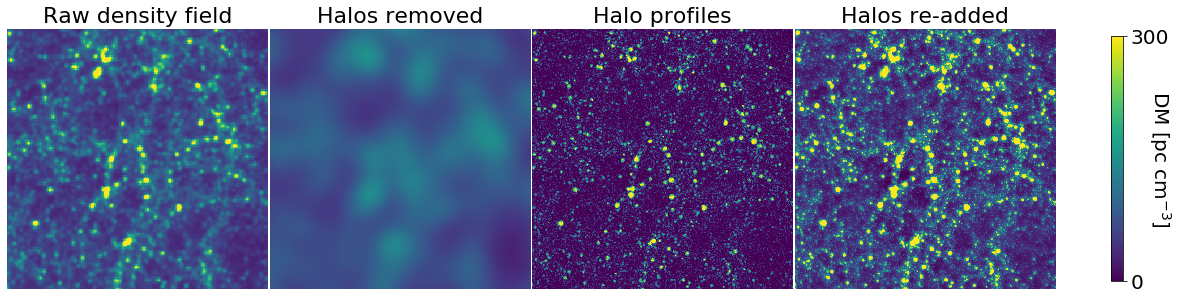

In [111]:
## Image plots of methodology

# All fields:
# Raw 512 density field
# Only halo field 1024
# Halos removed field 1024
# Halos readded field 8K

# Outputs:histograms,halos-readded field, halo addition masks, halos field for subtraction, halo addition field, stacked halo field

# Grid and color settings

l=0
u=200
du=0

vmin = 0
vmax= 300



f, ([ax1,ax2,ax4,ax5]) = plt.subplots(1, 4,gridspec_kw={'hspace': 0.015, 'wspace': .01}, figsize=(20,10)) # f is the whole plot

# original density

axis1=ax1.imshow(all_den_fields_512[0,l:u,l:u],vmin=vmin,vmax=vmax)
axis2=ax2.imshow(3*STH8_512[3][0,l:u,l:u],vmin=vmin,vmax=vmax)
axis4=ax4.imshow(STH8_512[4][0,16*l:16*u,16*l:16*u],vmin=vmin,vmax=vmax)
axis5=ax5.imshow(STH8_512[1][0,16*l:16*u,16*l:16*u],vmin=vmin,vmax=vmax)



# axis1=ax1.imshow(orig_den_256[0:u,0:u],vmin=vmin,vmax=vmax)
# axis2 = ax2.imshow(test_conv[3][0:4*u,0:4*u],vmin=vmin,vmax=vmax)
# axis4=ax4.imshow(test_conv[1][0:u,0:u],vmin=vmin,vmax=vmax)
# axis5=ax5.imshow(test_conv[0][0:4*u,0:4*u],vmin=vmin,vmax=vmax)


# Set ticks off
ax1.axis('off')
ax2.axis('off')
ax4.axis('off')
ax5.axis('off')


# f.colorbar(axis1,ax=ax2,shrink=0.5)
# f.colorbar(axis2,ax=ax2, shrink=0.5)
# f.colorbar(axis3,ax=ax3, shrink=0.5)
# f.colorbar(axis4,ax=ax4, shrink=0.5)
# f.colorbar(axis5,ax=ax5, shrink=0.5)


ax1.set_title('Raw density field',size=sub_title_size)
ax2.set_title('Halos removed',size=sub_title_size)
ax4.set_title('Halo-associated gas',size=sub_title_size)
ax5.set_title('Final gas density field',size=sub_title_size)

cbar=f.colorbar(axis1, ax=[ax1,ax2,ax4,ax5], orientation='vertical', fraction=.011,ticks=[0,vmax])
cbar.set_label('DM [pc cm$^{-3}$]', rotation=270,fontsize='20')
# cbar.set_label('DM [pc $cm^{-3}$]', rotation=270,fontsize='20')

f.savefig('implot_add_remove_halos_512.pdf',bbox_inches='tight')

# Figure: Histograms comparing 256 and 512 grids

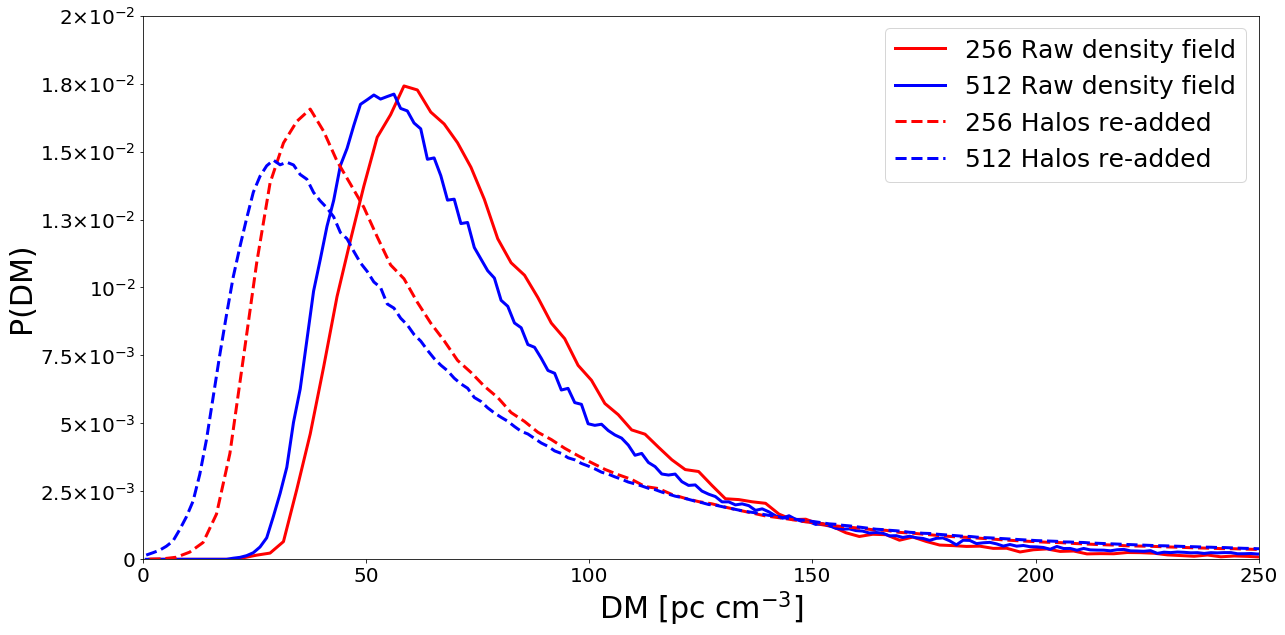

In [119]:
## Histograms


plt.figure(figsize=(20,10))

# All fields:
# Raw 512 density field
# Only halo field 1024
# Halos removed field 1024
# Halos readded field 8K





hist_256 = histArray(all_den_fields_256[0,:,:],100,256,0,300)
hist_512 = histArray(all_den_fields_512[0,:,:],200,512,0,300)


hist_256_rem = histArray(STH8_256[1][0,:,:],100,256*32,0,300)
hist_512_rem = histArray(STH8_512[1][0,:,:],200,512*16,0,300)

plt.plot(hist_256[0],hist_256[1],'-',label='256 Raw density field',lw=curve_lw,color='r')
plt.plot(hist_512[0],hist_512[1],'-',label='512 Raw density field',lw=curve_lw,color='b')


plt.plot(hist_256_rem[0],hist_256_rem[1],'--',label='256 Halos re-added',lw=curve_lw,color='r')        
plt.plot(hist_512_rem[0],hist_512_rem[1],'--',label='512 Halos re-added',lw=curve_lw,color='b')



plt.xlabel('DM [pc cm$^{-3}$]',fontsize='30')
plt.ylabel('P(DM)',fontsize='30')
plt.xlim(0,250)
plt.legend(loc='upper right',prop={'size':'25'})
plt.ylim(0,.02)


f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))


plt.savefig('hist_add_remove_halos.pdf',bbox_inches='tight')

In [120]:
SD_256_RA = np.round(np.sqrt((all_den_fields_256[0,:,:]).var()),2) 
SD_256_HA = np.round(np.sqrt((STH8_256[1][0,:,:]).var()),2) 


SD_512_RA = np.round(np.sqrt((all_den_fields_512[0,:,:]).var()),2) 
SD_512_HA = np.round(np.sqrt((STH8_512[1][0,:,:]).var()),2) 

In [121]:
print(SD_256_RA,SD_256_RA)

print(SD_512_RA,SD_512_RA)

37.66 37.66
51.36 51.36


## Resolution comparison

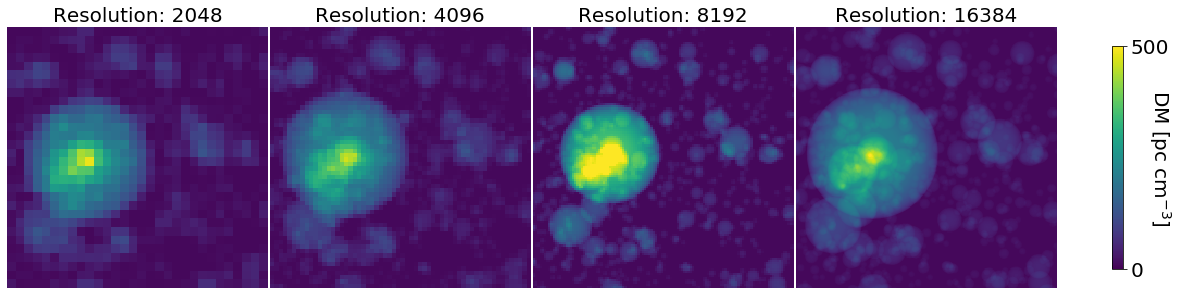

In [118]:
## Image plots of methodology

# All fields:
# Halos readded field 1K, 2K, 4K, 8K




# Grid and color settings

l=0
u=15
du=0

vmin = -10
vmax= 500



# f, ([ax1, ax2,ax4,ax5]) = plt.subplots(1, 4, figsize=(20,10)) # f is the whole plot
f, ([ax2,ax4,ax5,ax6]) = plt.subplots(1, 4,gridspec_kw={'hspace': 0.015, 'wspace': .01}, figsize=(20,10)) # f is the whole plot

# original density


# axis1=ax1.imshow(STH1_256[4][0,0:u,0:u],vmin=vmin,vmax=vmax)
axis2 = ax2.imshow(STH2_256[4][0,0:2*u,0:2*u],vmin=vmin,vmax=vmax)
axis4=ax4.imshow(STH4_256[4][0,0:4*u,0:4*u],vmin=vmin,vmax=vmax)
axis5=ax5.imshow(STH8_256[4][0,0:8*u,0:8*u],vmin=vmin,vmax=vmax)
axis6=ax6.imshow(STH16_256[4][0,0:16*u,0:16*u],vmin=vmin,vmax=vmax)



# axis1=ax1.imshow(STH2_256[4][0,0:2*u,0:2*u],vmin=vmin,vmax=vmax)
# axis2 = ax2.imshow(STH4_256[4][0,0:4*u,0:4*u],vmin=vmin,vmax=vmax)
# axis4=ax4.imshow(fire2_256[4][0,0:2*u,0:2*u],vmin=vmin,vmax=vmax)
# axis5=ax5.imshow(fire4_256[4][0,0:4*u,0:4*u],vmin=vmin,vmax=vmax)


# Set ticks off
ax1.axis('off')
ax2.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')


# ax1.set_title('Resolution: 1024',size='20')
ax2.set_title('Resolution: 2048',size='20')
ax4.set_title('Resolution: 4096',size='20')
ax5.set_title('Resolution: 8192',size='20')
ax6.set_title('Resolution: 16384',size='20')


# ax1.set_title('Resolution: 2048',size='20')
# ax2.set_title('Resolution: 8192',size='20')
# ax4.set_title('Resolution: 2048',size='20')
# ax5.set_title('Resolution: 8192',size='20')

# ax1.set_title('Resolution: 2048',size='15')
# ax2.set_title('Resolution: 8192',size='15')
# ax4.set_title('Resolution: 2048',size='15')
# ax5.set_title('Resolution: 8192',size='15')



# cbar=f.colorbar(axis1, ax=[ax1, ax2,ax4,ax5], orientation='vertical', fraction=.01,ticks=[0,vmax])
cbar=f.colorbar(axis1, ax=[ax2,ax4,ax5,ax6], orientation='vertical', fraction=.01,ticks=[0,vmax])
cbar.set_label('DM [pc cm$^{-3}$]', rotation=270,fontsize='20')

# cbar=f.colorbar(axis1, ax=[ax1, ax2,ax4,ax5], orientation='vertical', fraction=.1,ticks=[0,vmax/3,2*vmax/3,vmax])
# cbar.set_label('DM', rotation=0,fontsize='20')



#f.colorbar(axis2)


f.savefig('implot_resolution_comparison.pdf',bbox_inches='tight')

In [159]:
STH1_hist = create_histograms(STH1_256[1],1024)
STH2_hist = create_histograms(STH2_256[1],2*1024)
STH4_hist = create_histograms(STH4_256[1],4*1024)
STH8_hist = create_histograms(STH8_256[1],8*1024)
STH16_hist = create_histograms(STH16_256[1],16*1024)

In [156]:
fire1_hist = create_histograms(fire1_256[1],1024)
fire2_hist = create_histograms(fire2_256[1],2*1024)
fire4_hist = create_histograms(fire4_256[1],4*1024)
fire8_hist = create_histograms(fire8_256[1],8*1024)
fire16_hist = create_histograms(fire16_256[1],16*1024)

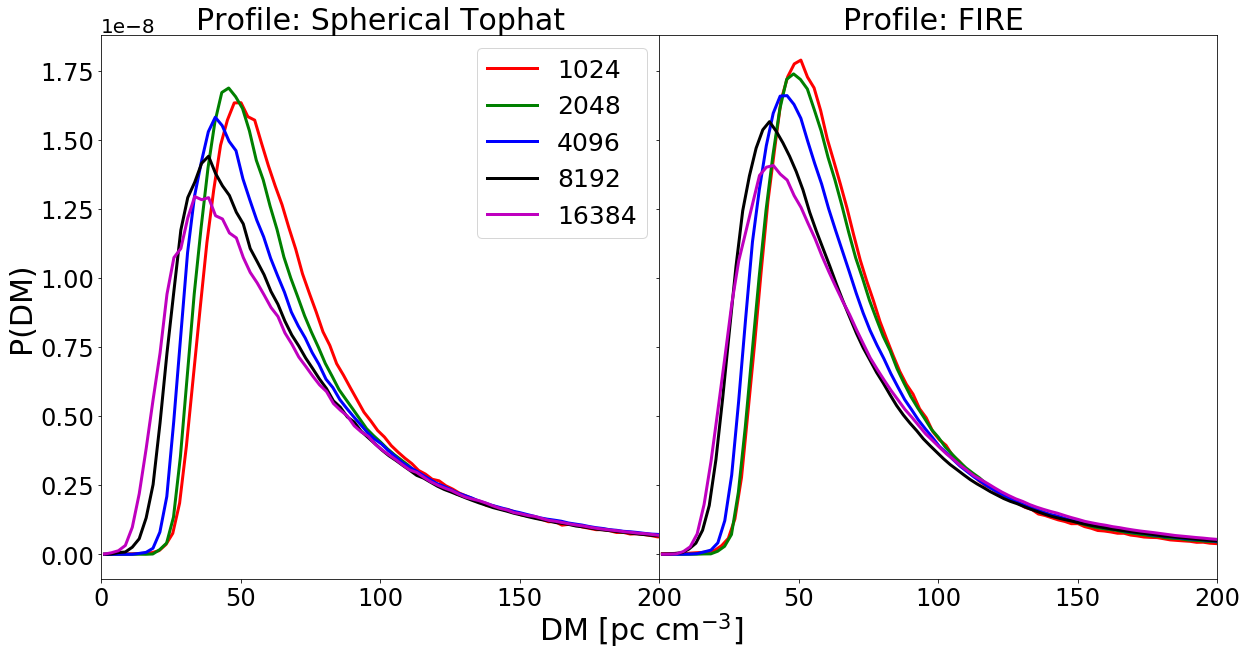

In [277]:
## Histograms


# plt.figure(figsize=(12,6))

fig, axs = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))

# fig, axs = plt.subplots(2, 1, sharex='col', sharey='row',
#                         gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(10,20))



# All fields:
# Halos readded field 1K, 2K, 4K, 8K

nbin=300

# hist_1 = histArray(orig_den_256,nbin,256)
# hist_2 = histArray(test_conv[3],nbin,1024)
# hist_3 = histArray(test_conv[4],nbin,1024)
# hist_4 = histArray(test_conv[1],nbin,1024)
# hist_5 = histArray(test_conv[0],nbin,1024)



# Left panel
# axs[0].plot(STH1_256[0][0],STH1_256[0][1],'-',label='1024',lw=curve_lw,color='r')
# axs[0].plot(STH2_256[0][0],STH2_256[0][1],'-',label='2048',lw=curve_lw,color='g')
# axs[0].plot(STH4_256[0][0],STH4_256[0][1],'-',label='4096',lw=curve_lw,color='b')
# axs[0].plot(STH8_256[0][0],STH8_256[0][1],'-',label='8192',lw=curve_lw,color='k')
# axs[0].plot(STH16_256[0][0],STH16_256[0][1],'-',label='16384',lw=curve_lw,color='m')


axs[0].plot(STH1_hist[0],STH1_hist[1],'-',label='1024',lw=curve_lw,color='r')
axs[0].plot(STH2_hist[0],STH2_hist[1],'-',label='2048',lw=curve_lw,color='g')
axs[0].plot(STH4_hist[0],STH4_hist[1],'-',label='4096',lw=curve_lw,color='b')
axs[0].plot(STH8_hist[0],STH8_hist[1],'-',label='8192',lw=curve_lw,color='k')
axs[0].plot(STH16_hist[0],STH16_hist[1],'-',label='16384',lw=curve_lw,color='m')










# Right panel
# axs[1].plot(fire1_256_1box[0],fire1_256_1box[1],'-',label='1024',lw=curve_lw,color='r')
# axs[1].plot(fire2_256_1box[0],fire2_256_1box[1],'-',label='2048',lw=curve_lw,color='g')
# axs[1].plot(fire4_256_1box[0],fire4_256_1box[1],'-',label='4096',lw=curve_lw,color='b')
# axs[1].plot(fire8_256_1box[0],fire8_256_1box[1],'-',label='8192',lw=curve_lw,color='k')
# # axs[1].plot(fire16_256[0][0],fire16_256[0][1],'.',label='16384',lw=curve_lw)
# axs[1].plot(test_hist2[0],test_hist2[1],'-',label='16384',lw=curve_lw,color='m')


axs[1].plot(fire1_hist[0],fire1_hist[1],'-',label='1024',lw=curve_lw,color='r')
axs[1].plot(fire2_hist[0],fire2_hist[1],'-',label='2048',lw=curve_lw,color='g')
axs[1].plot(fire4_hist[0],fire4_hist[1],'-',label='4096',lw=curve_lw,color='b')
axs[1].plot(fire8_hist[0],fire8_hist[1],'-',label='8192',lw=curve_lw,color='k')
axs[1].plot(fire16_hist[0],fire16_hist[1],'-',label='16384',lw=curve_lw,color='m')



axs[0].set_xlim(0,200)
axs[1].set_xlim(0.01,200)




axs[0].set_ylabel('P(DM)',fontsize='30')

axs[0].legend(loc='upper right',prop={'size':'25'})
# plt.setp(leg.get_title(),fontsize=20)

# plt.ylim(0,1)

fig.text(0.5, 0.04, 'DM [pc cm$^{-3}$]', ha='center',fontsize=30)

axs[0].set_title('Profile: Spherical Tophat',size='30')
axs[1].set_title('Profile: FIRE ',size='30')


# Size of ticks
axs[0].tick_params(axis='both', which='major', labelsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=24)


plt.savefig('hist_resolution_comparsion.pdf',bbox_inches='tight')